In [1]:
# Load the SDK
%matplotlib inline
from lyft_dataset_sdk.lyftdataset import LyftDataset
import matplotlib.pyplot as plt
# Load the dataset
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps, v1.0.1-train
data_path='/Users/kanhua/Downloads/3d-object-detection-for-autonomous-vehicles'
level5data = LyftDataset(data_path='/Users/kanhua/Downloads/3d-object-detection-for-autonomous-vehicles', 
                         json_path='/Users/kanhua/Downloads/3d-object-detection-for-autonomous-vehicles/data/', 
                         verbose=True)

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 12.7 seconds.
Reverse indexing ...
Done reverse indexing in 4.5 seconds.


In [2]:
from lyft_dataset_sdk.lyftdataset import LyftDatasetExplorer

In [3]:
my_scene = level5data.scene[0]
my_sample_token = my_scene["first_sample_token"]

In [4]:
my_scene

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

## Get data from token

In [6]:
my_sample=level5data.get('sample',my_sample_token)
my_sample

{'next': 'c2ba18e4414ce9038ad52efab44e1a0a211ff1e6b297a632805000510756174d',
 'prev': '',
 'token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'timestamp': 1557858039302414.8,
 'scene_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'data': {'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
  'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
  'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
  'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
  'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
  'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
  'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
  'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
  'LIDAR

In [7]:
my_sample['anns'][0]

'2a03c42173cde85f5829995c5851cc81158351e276db493b96946882059a5875'

In [10]:
level5data.get('sample_annotation',my_sample['anns'][0])

{'token': '2a03c42173cde85f5829995c5851cc81158351e276db493b96946882059a5875',
 'num_lidar_pts': -1,
 'size': [1.997, 5.284, 1.725],
 'sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'rotation': [0.1539744509331139, 0, 0, 0.9880748293827983],
 'prev': '',
 'translation': [1048.155950230245, 1691.8102354006162, -23.304943447792454],
 'num_radar_pts': 0,
 'attribute_tokens': ['1ba8c9a8bda54423fa710b0af1441d849ecca8ed7b7f9393ba1794afe4aa6aa2',
  'daf16a3f6499553cc5e1df4a456de5ee46e2e6b06544686d918dfb1ddb088f6f'],
 'next': '9986dac1bcecb560153ab58ae7560028caeed3c1e067b37503cf50932e983afc',
 'instance_token': '695097711d9ec763b55f24d04ae9eb51289575645968f00723cee666a9f68c27',
 'visibility_token': '',
 'category_name': 'car'}

Rendering pointclouds to image internally consists of the following steps:

Key function for doing this transformation is 

```LyftDatasetExplorer.map_pointcloud_to_image(self, pointsensor_token: str, camera_token: str) -> Tuple```

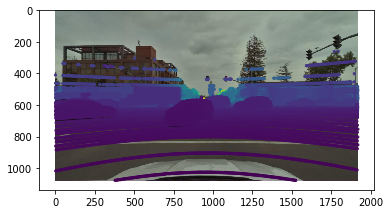

In [51]:
lde=LyftDatasetExplorer(level5data)
points,coloring,img=lde.map_pointcloud_to_image(my_sample['data']['LIDAR_TOP'],my_sample['data']['CAM_FRONT'])
plt.imshow(img)
plt.scatter(points[0, :], points[1, :], c=coloring, s=5)

### Play with different channels to see the differece of rendered image:

points_sensor_channel={'LIDAR_TOP','LIDAR_FRONT_LEFT'}

camera_channel={'CAM_FRONT','CAM_FRONT_LEFT'}

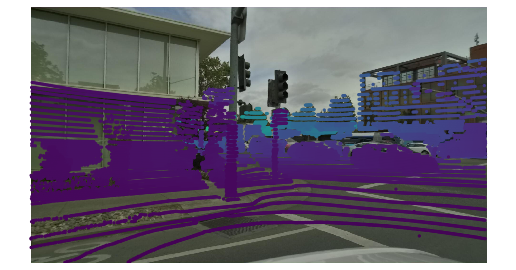

In [52]:
level5data.render_pointcloud_in_image(my_sample['token'],pointsensor_channel='LIDAR_FRONT_LEFT',camera_channel='CAM_FRONT_LEFT')

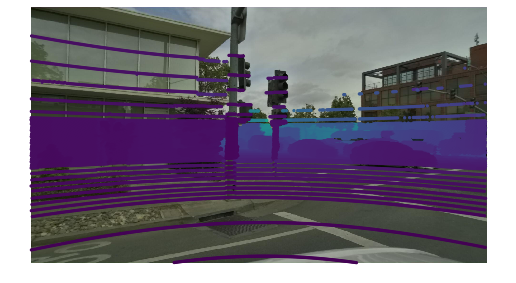

In [53]:
level5data.render_pointcloud_in_image(my_sample['token'],pointsensor_channel='LIDAR_TOP',camera_channel='CAM_FRONT_LEFT')

In [54]:
next_sample = level5data.get('sample', my_sample["next"])

## Get sample data

In [ ]:
sensor_channel = 'LIDAR_TOP'  # also try this e.g. with 'LIDAR_TOP'
my_sample_data = level5data.get('sample_data', my_sample['data'][sensor_channel])
my_sample_data

In [ ]:
level5data.render_sample_data(my_sample_data['token'],nsweep=5)

In [ ]:
my_next_sample_data=level5data.get('sample_data',my_sample_data['next'])

In [ ]:
my_next_sample_data

In [ ]:
my_next_sample_data_2 = level5data.get('sample_data', my_next_sample_data['next'])

## Look at annotations

In [ ]:
level5data.sample_annotation[0]